In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

import numpy as np
import scipy as sp

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Image
from IPython.core.display import Image

In [2]:
# Load data
data = pd.read_csv('all_modeling_data.csv')
print '# Rows: {}, and # Columns, {}'.format(data.shape[0], data.shape[1])

# Rows: 378, and # Columns, 74


In [3]:
# Data has infinity values: replace +inf and -inf with NaN
data = data.replace([np.inf, -np.inf], np.nan)

In [4]:
cols = data.columns.tolist()
for i, j in enumerate(cols):
    print i, '-->', j

0 --> County
1 --> Jurisdiction
2 --> Longitude
3 --> Latitude
4 --> Target_ResPPD_2013
5 --> Annual_ResPPD_2013
6 --> Target_EmpPPD_2013
7 --> Annual_EmpPPD_2013
8 --> Log_Target_ResPPD_2013
9 --> Log_Annual_ResPPD_2013
10 --> Log_Target_EmpPPD_2013
11 --> Log_Annual_EmpPPD_2013
12 --> Diversity_Index
13 --> Voter_Registration_Rate
14 --> Rep_Dem_Ratio
15 --> Major_Minor_Crime_Ratio
16 --> Percent_Violent
17 --> TotCrime/1000People
18 --> Crime_Index
19 --> HH_Income_Ratio
20 --> Fam_Income_Ratio
21 --> gMean_Income_Index
22 --> PerCapitaIncome_Index
23 --> Travel_Time_Index
24 --> gMedian_Income_Index
25 --> MF_MedianEarnings_Index
26 --> Solar_ResUnits/Person
27 --> Solar_ResUnits/HH
28 --> MeanTravelTimetoWork
29 --> PercentLvgHmBefore8am
30 --> PercentNotDrivingAlonetoWork
31 --> PercentWorkingOOState
32 --> PercentWorkingOOCounty
33 --> PercentLessThan3CarsAvail
34 --> MedEarningsBachelorsDeg
35 --> PercentTotalwBachDegUnder45
36 --> PercentTotalHSGradUnder45
37 --> Percent18to24

## Feature Engineering Y 

In [5]:
# Difference between Target PPD - Annual PPD
data['Difference'] = data['Target_ResPPD_2013'] - data['Annual_ResPPD_2013']
print 'Number of rows: {}'.format(data.shape[0])

Number of rows: 378


In [6]:
#lab = ['High', 'Medium', 'Low', 'Very Low']
lab = ['Low', 'Fair', 'Good', 'Excellent']
data['Label'] = pd.qcut(data['Difference'], 4, labels = lab)

In [7]:
## Levels of qcut
pd.qcut(data['Difference'], 4, labels = None).levels

Index([u'[-1.9, 1.3]', u'(1.3, 2.4]', u'(2.4, 3.6]', u'(3.6, 7052.8]'], dtype='object')

In [8]:
data.groupby(['Label'])['Jurisdiction'].count()

Label
Excellent    91
Fair         95
Good         88
Low          92
Name: Jurisdiction, dtype: int64

## KMeans

In [9]:
# Prepare data
temp = data.copy() # Precaution to not modify source dataframe

# X cols
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

# Get values
km_std = x_std.values

### Silhouette analysis on KMeans Clustering

> Silhoette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Silhouette score by n_clusters
for i in range(2, 11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(km_std)
    print 'Clusters: {} --> Silhouette Score: {}'.format(i, metrics.silhouette_score(km_std, k_means.labels_))

Clusters: 2 --> Silhouette Score: 0.157811910958
Clusters: 3 --> Silhouette Score: 0.159939655962
Clusters: 4 --> Silhouette Score: 0.115423811237
Clusters: 5 --> Silhouette Score: 0.134262267416
Clusters: 6 --> Silhouette Score: 0.148300838617
Clusters: 7 --> Silhouette Score: 0.0943750286664
Clusters: 8 --> Silhouette Score: 0.100926673094
Clusters: 9 --> Silhouette Score: 0.0954027922806
Clusters: 10 --> Silhouette Score: 0.112801971208


/Applications/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [11]:
from sklearn.decomposition import PCA # PCA
from sklearn.lda import LDA # LDA
from sklearn.cluster import KMeans # KMeans
from sklearn import metrics # Silhouette score

def k_means_clustering(n, X):
    '''
    n = Number of clusters (up to 10). X is numpy array of features
    '''
    # KMeans
    k_means = KMeans(n_clusters = n)
    k_means.fit(X)
    s_score = metrics.silhouette_score(X, k_means.labels_)
    print 'Clusters: {} --> Silhouette Score: {}'.format(n, s_score)
    # LDA using labels from KMeans
    lda = LDA()
    lda_comp = lda.fit_transform(X, k_means.labels_)
    ldadf = pd.DataFrame({'label': k_means.labels_})
    # Populate the dataframe with LD's 
    for i in range(lda_comp.shape[1]):
        ldadf['ld-%i' % (i+1)] = lda_comp[:, i]
    # Set color
    c0 = sns.color_palette("Set2", 10)[0]
    c1 = sns.color_palette("Set2", 10)[1]
    c2 = sns.color_palette("Set2", 10)[2]
    c3 = sns.color_palette("Set2", 10)[3]
    c4 = sns.color_palette("Set2", 10)[4]
    c5 = sns.color_palette("Set2", 10)[5]
    c6 = sns.color_palette("Set2", 10)[6]
    c7 = sns.color_palette("Set2", 10)[7]
    c8 = sns.color_palette("Set2", 10)[8]
    c9 = sns.color_palette("Set2", 10)[9]

    colors = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]
    plt.figure(figsize = (20, 10))
    for label, color in zip(ldadf['label'].unique(), colors):
        # Filter df by status
        mask = ldadf['label'] == label
        print 'Number of points in cluster-{}: {}'.format(label, sum(mask))
        plt.scatter(ldadf[mask]['ld-1'], ldadf[mask]['ld-2'], label = label, color = color, alpha = 0.85, s = 50)
        plt.xlabel("LD-1", fontsize = 16)
        plt.ylabel("LD-2", fontsize = 16)    
        plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
        plt.legend(prop={'size': 14})
        plt.title('LDA via KMeans ({} Clusters)'.format(n), fontsize = 18)
    return k_means.labels_

Clusters: 4 --> Silhouette Score: 0.116216119633
Number of points in cluster-1: 51
Number of points in cluster-2: 133
Number of points in cluster-0: 179
Number of points in cluster-3: 15


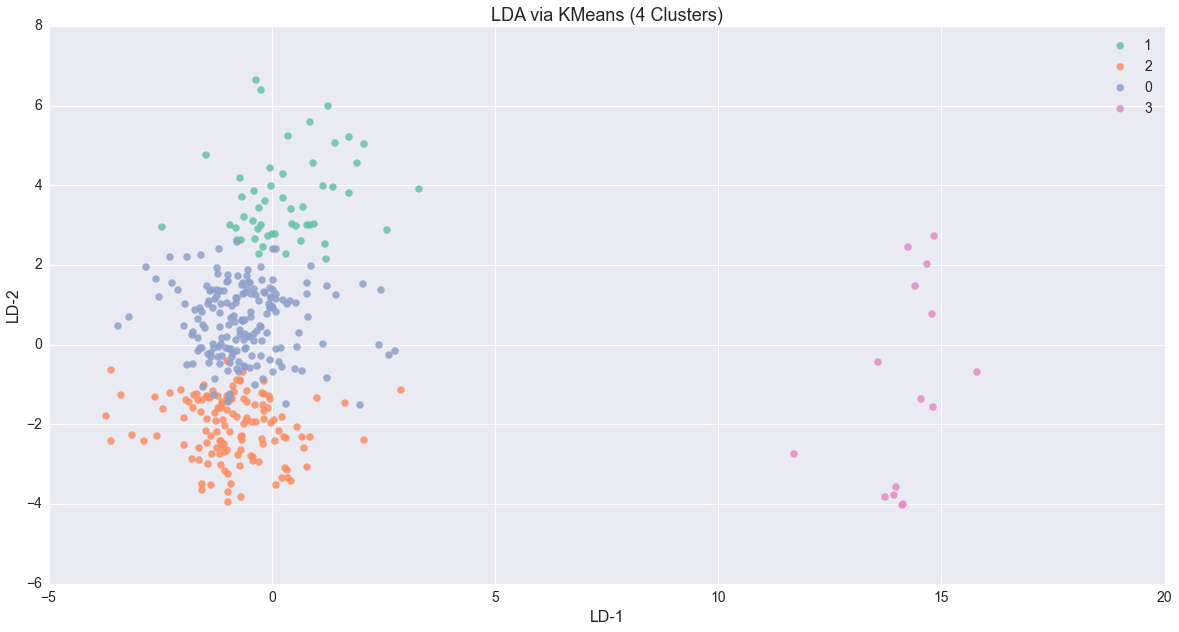

In [12]:
## Run function to visualize clusters to develop y-labels
# n_clusters = 4
y_labels = k_means_clustering(4, km_std)

In [13]:
temp['Cluster'] = y_labels

## Decision Tree

In [14]:
from sklearn import tree

# Create an instance of DT classifier
clf = tree.DecisionTreeClassifier()

# Fit Decision Trees
clf = clf.fit(temp_x, y_labels)

In [15]:
# Visualize Tree: Need to install package from http://www.graphviz.org/
from sklearn.externals.six import StringIO
with open('tree.dot', 'w') as output_file:
    output_file = tree.export_graphviz(clf, out_file = output_file)

# dot -Tps filename.dot -o outfile.ps # where 'ps' is file format
!dot -Tpng tree.dot > tree.png

In [16]:
for i, j in zip(temp_x.columns, clf.feature_importances_):
    if j > 0:
        print 'Feature: {} and Feature Importance: {}'.format(i,j)

Feature: Rep_Dem_Ratio and Feature Importance: 0.00826115826481
Feature: Major_Minor_Crime_Ratio and Feature Importance: 0.0303661614798
Feature: Percent_Violent and Feature Importance: 0.00273513000985
Feature: Crime_Index and Feature Importance: 0.0159523946673
Feature: HH_Income_Ratio and Feature Importance: 0.00805001699898
Feature: PerCapitaIncome_Index and Feature Importance: 0.616182727556
Feature: gMedian_Income_Index and Feature Importance: 0.00816916984981
Feature: MF_MedianEarnings_Index and Feature Importance: 0.0289692442787
Feature: Solar_ResUnits/Person and Feature Importance: 0.00557966522009
Feature: Solar_ResUnits/HH and Feature Importance: 0.0062771233726
Feature: PercentLvgHmBefore8am and Feature Importance: 0.0062771233726
Feature: PercentLessThan3CarsAvail and Feature Importance: 0.018469461896
Feature: Percent25andOverNotHSGrad and Feature Importance: 0.0250826006217
Feature: PovertyRate25OverHSGrad and Feature Importance: 0.0163042165522
Feature: MBSAPercentofTo

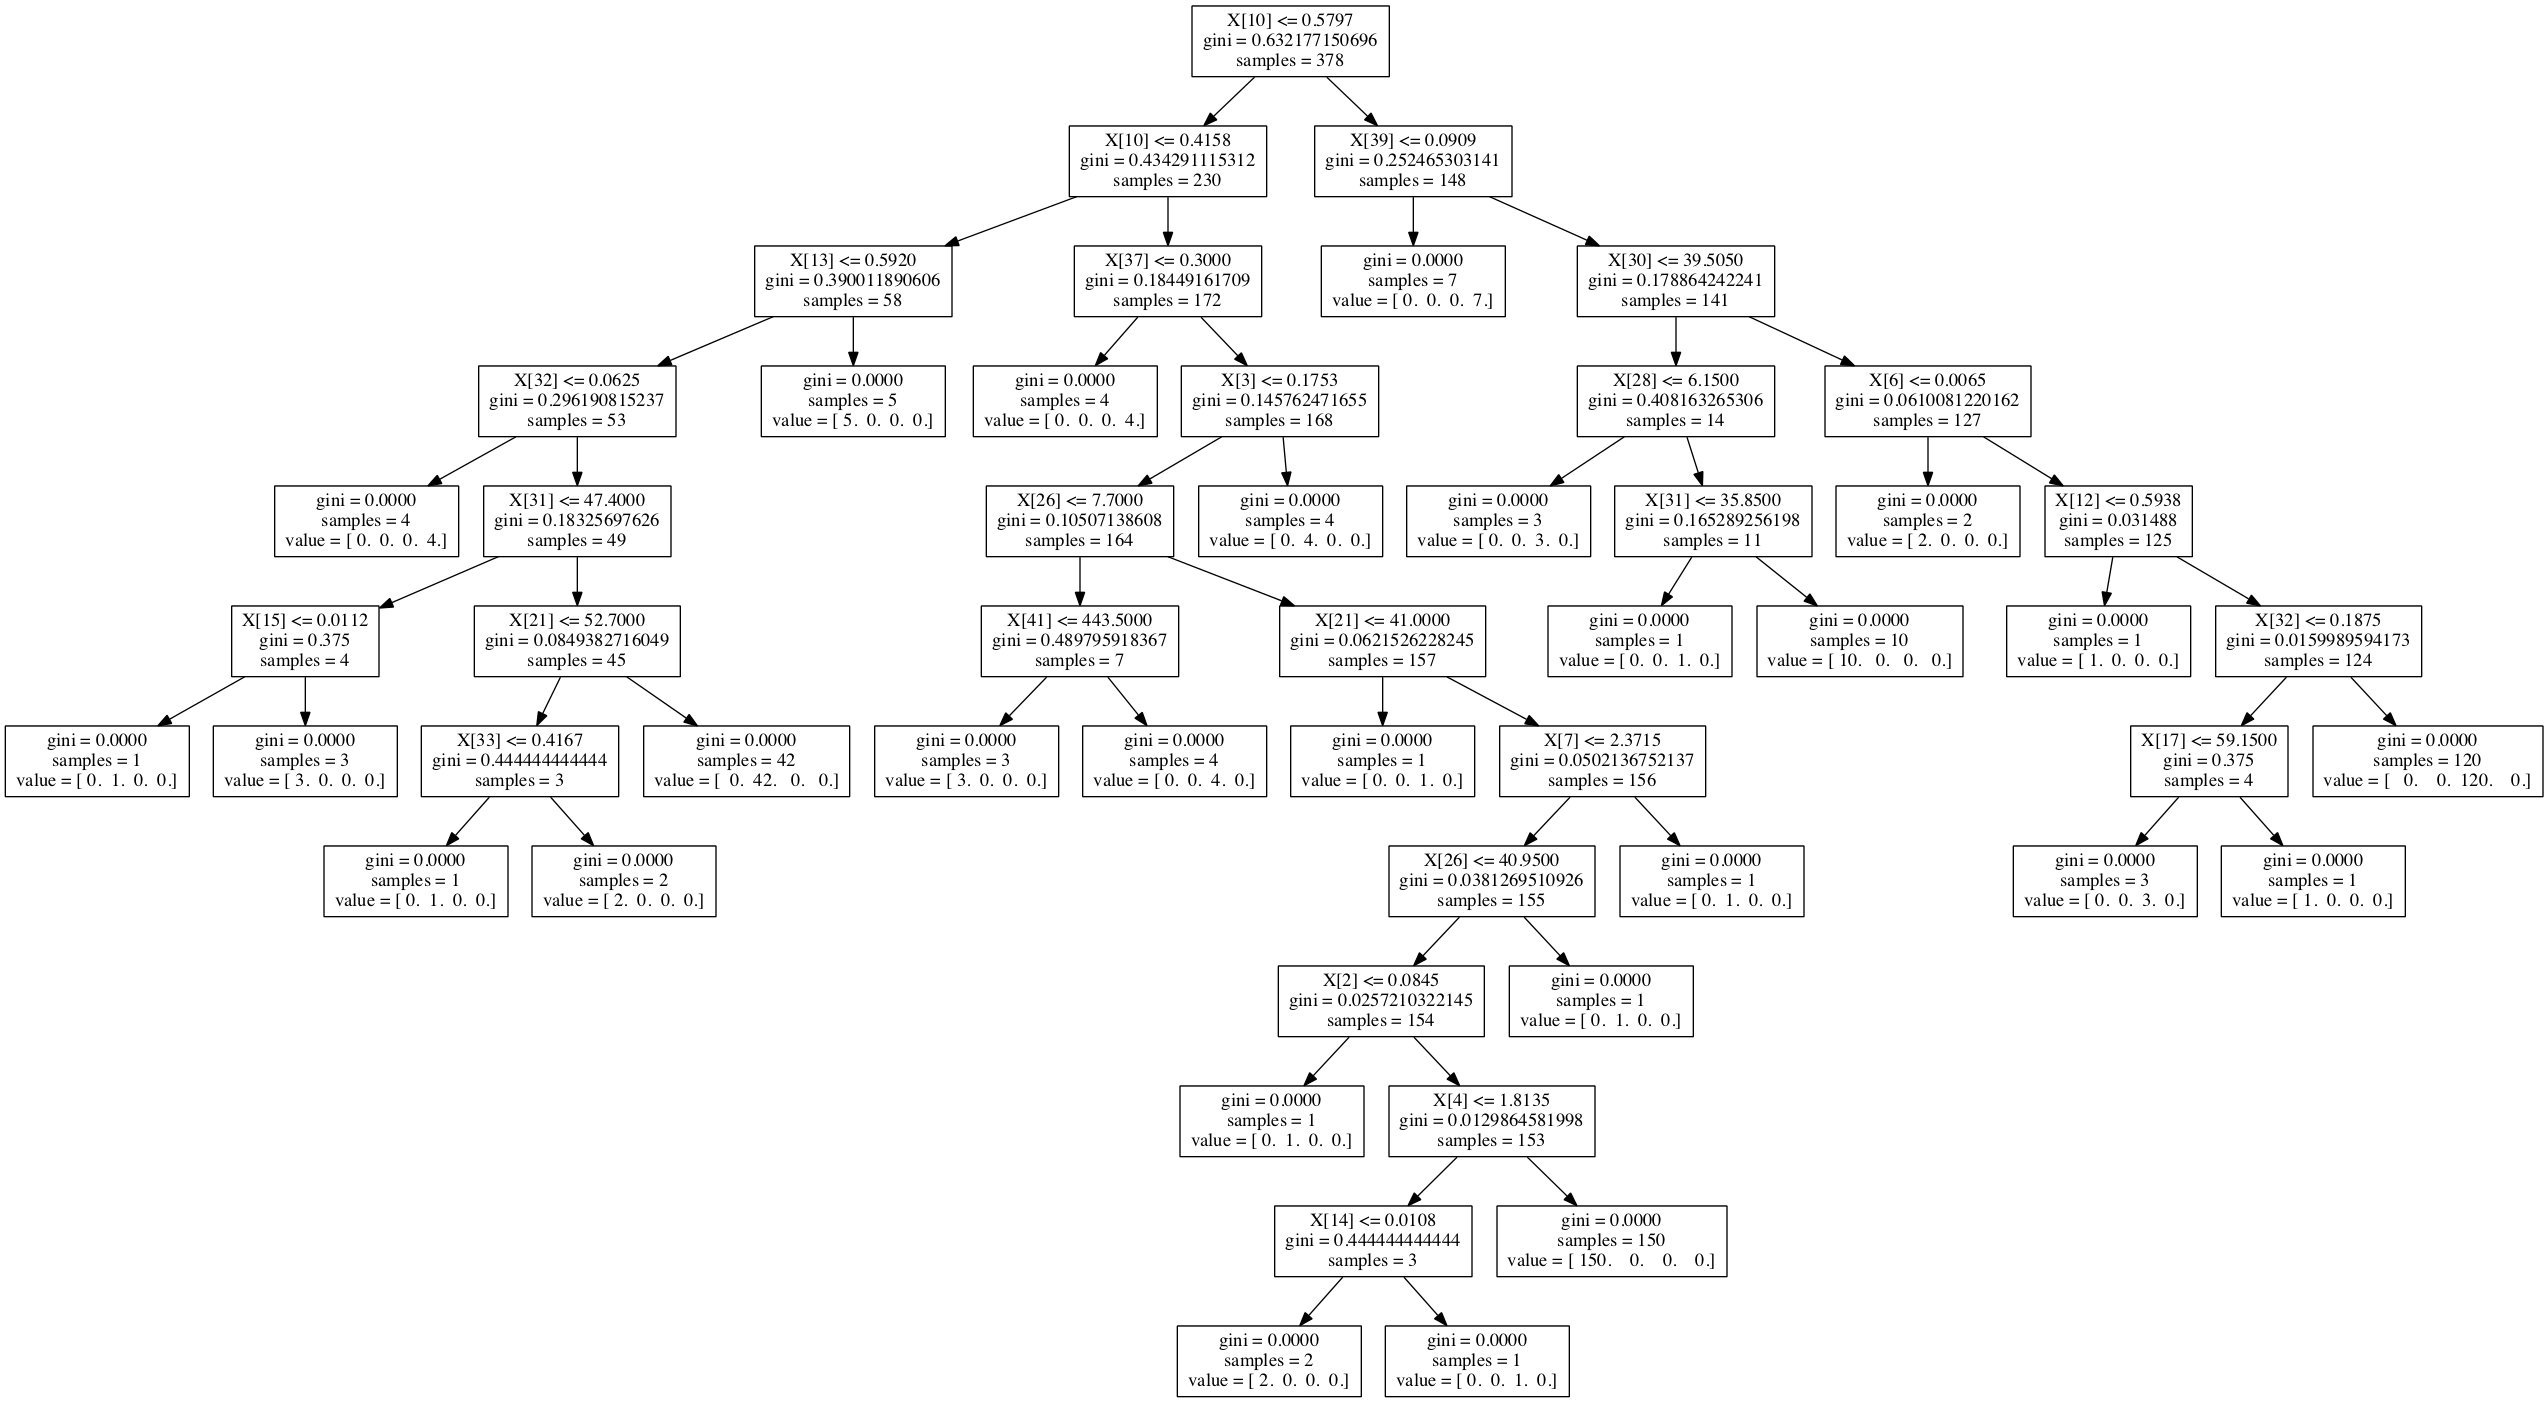

In [17]:
Image(filename = 'tree.png')

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10)
    scores.append(score_list)

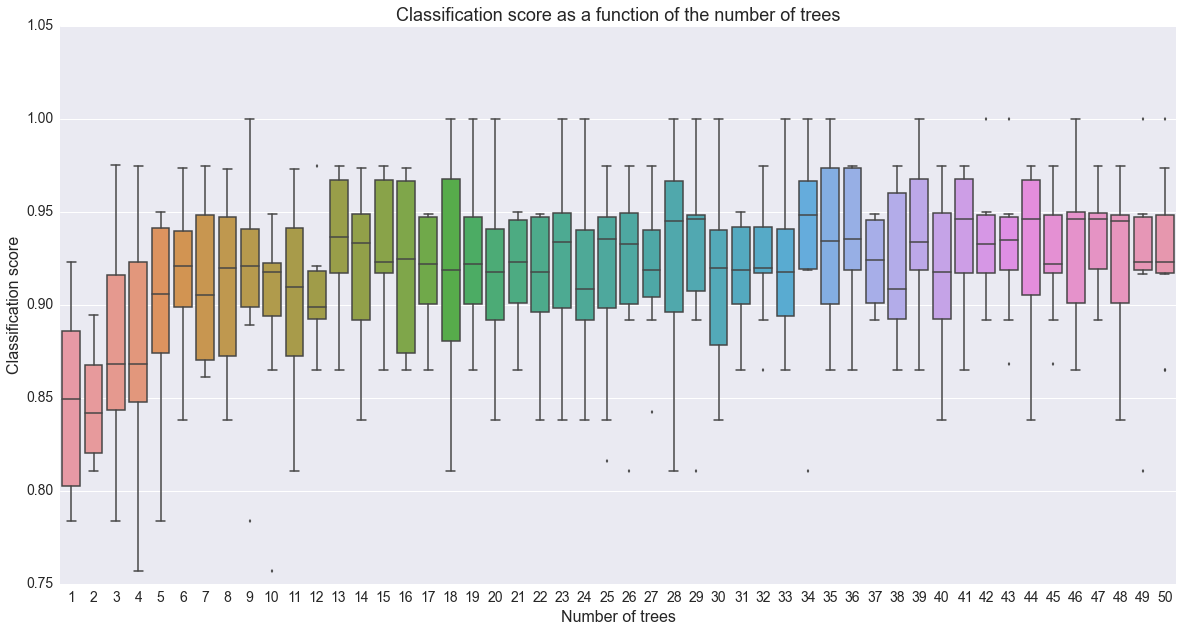

In [19]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('Classification score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Classification score as a function of the number of trees', fontsize = 18)
plt.show()

#### 12 trees - Good Classification Score

Accuracy seems to improve with additional trees. Need to consider computational cost of fitting additional treees compared to the small accuracy benefits. 

**Recall** example: airport security screening, where you want a strategy that pulls aside all malicious passengers, even if it means that you also end up pulling aside many innocent people.  

**Precision** example: when selecting job applicants for on-site interviews (which take a lot of time) you want to make sure that every selected applicant is good, and you don't care as much about interviewing every good applicant.


F-1 Score: Harmonic mean of recall and precision
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$
- The harmonic mean of two numbers is closer to the small of the two numbers than the standard arithmetic mean. F1 Score thus tends to favor classifiers that are strong in both precision and recall. 

In [20]:
scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10, scoring = 'f1')
    scores.append(score_list)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


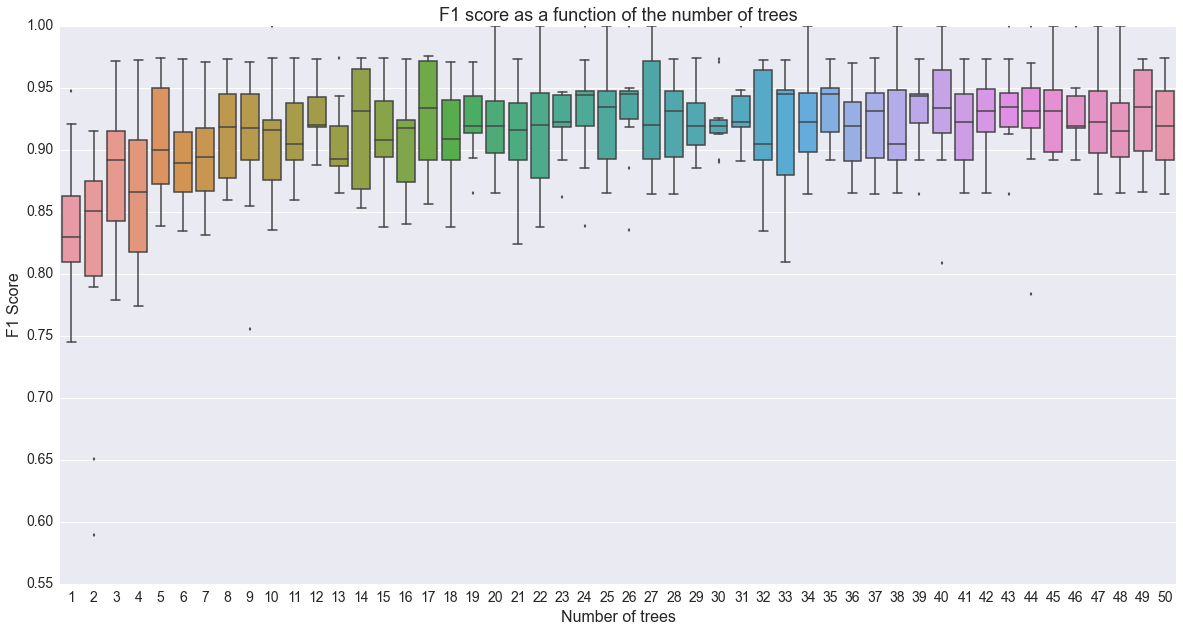

In [21]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('F1 Score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('F1 score as a function of the number of trees', fontsize = 18)
plt.show()

### Feature Importance (Random Forest)

In [22]:
clf = RandomForestClassifier(n_estimators = 12)
clf.fit(temp_x, y_labels)

# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists
feature_importance, feature_name = zip(*sorted(zip(feature_importance_list, feature_name_list)))

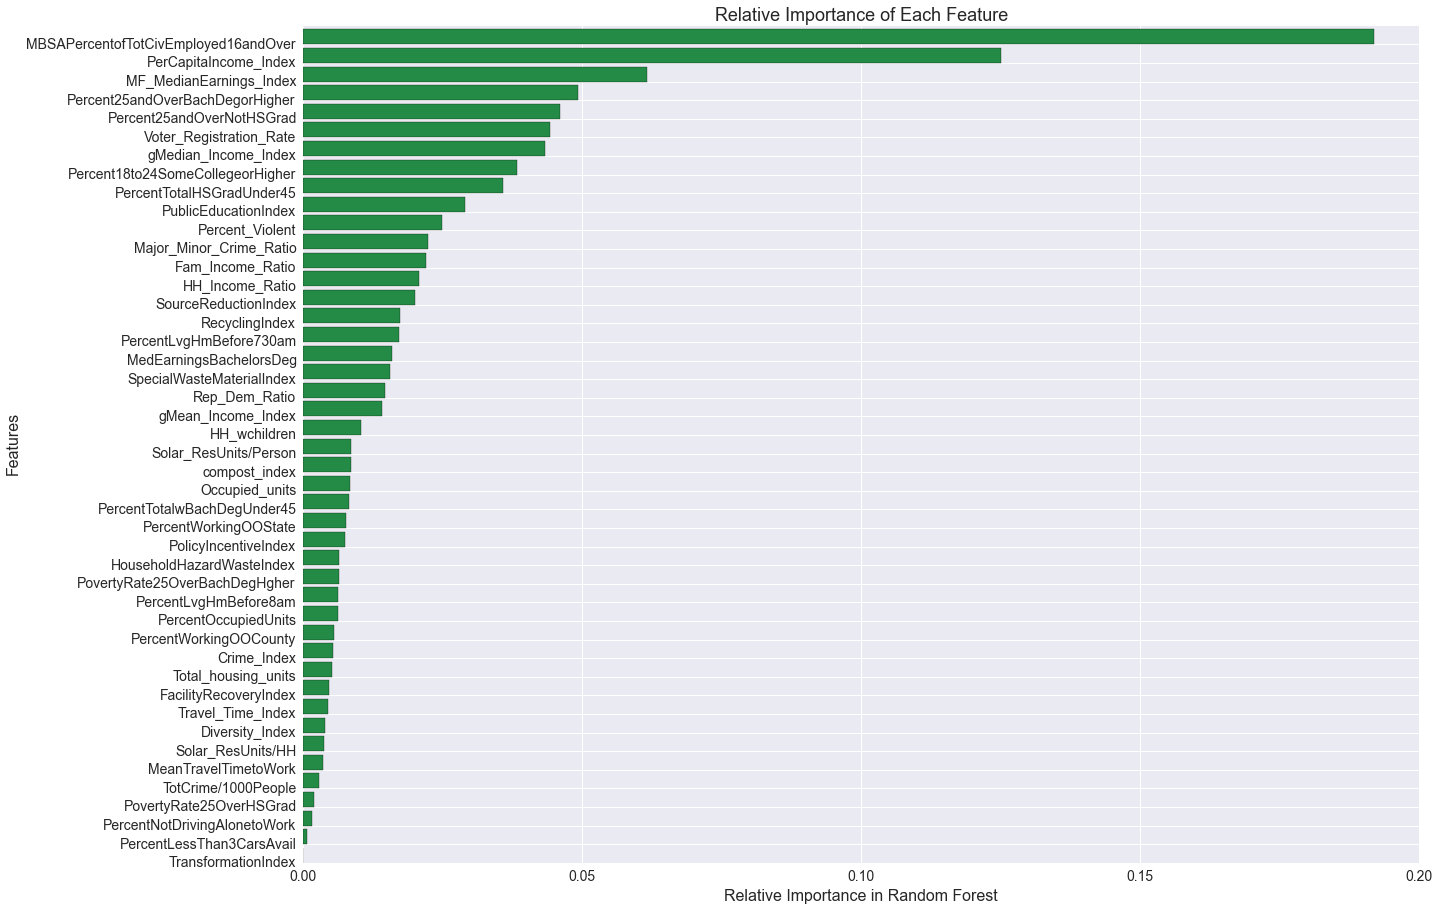

In [23]:
plt.figure(figsize = (20, 15))
plt.barh(range(len(feature_name)), feature_importance, color = '#238b45')#, align = 'center')
plt.yticks(range(len(feature_name)), feature_name)
plt.xlabel('Relative Importance in Random Forest', fontsize = 16)
plt.ylabel('Features', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Relative Importance of Each Feature', fontsize = 18)
plt.show()

## PCA Biplot

- Ref-1: https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/
- Ref-2: https://github.com/teddyroland/python-biplot/blob/master/biplot.py

In [50]:
## Biplot Datapreparation - Feature Names

# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists and sort in descending order
#featureImportance = sorted(zip(feature_importance_list, feature_name_list), reverse = True)
featureImportance = zip(feature_importance_list, feature_name_list)

# Get feature names when feature importance > 0.05
feature_names = []
for i in featureImportance:
    #if i[0] >= 0.05:
    if i[0] >= 0.03 and i[0] < 0.05:
    #if i[0] >= 0.02 and i[0] < 0.03:
        feature_names.append(i[1])
        
feature_names = feature_names

In [51]:
## Biplot Datapreparation - Dataframe
temp = data.copy()

# Select important features
biplot_data = temp[feature_names]

# Replace NaN's with median values
biplot_data = biplot_data.fillna(biplot_data.median())

# Normalized X
biplot_std = (biplot_data - biplot_data.mean(axis = 0))/biplot_data.std(axis = 0)

# Set Location as index
biplot_std.index = temp['Jurisdiction']
biplot_std.index = biplot_std.index.format()


# Difference Labels
biplot_std['Label'] = temp['Label'].values

# Cluster ID's
biplot_std['Cluster'] = y_labels

In [52]:
biplot_std.columns.tolist()[:-2]

['Voter_Registration_Rate',
 'gMedian_Income_Index',
 'PercentTotalHSGradUnder45',
 'Percent18to24SomeCollegeorHigher',
 'Percent25andOverNotHSGrad',
 'Percent25andOverBachDegorHigher']

In [53]:
biplot_std[biplot_std.columns.tolist()[:-2]].head()

,Voter_Registration_Rate,gMedian_Income_Index,PercentTotalHSGradUnder45,Percent18to24SomeCollegeorHigher,Percent25andOverNotHSGrad,Percent25andOverBachDegorHigher
Adelanto,-0.183834,-1.051798,1.669322,-1.519380,0.826819,-1.225179
Agoura Hills,-0.078709,1.413187,-1.019829,0.241346,-0.919654,1.163099
Alameda,-0.092145,0.676206,-0.000811,0.974411,-0.582497,0.842968
Albany,-0.101301,0.660995,0.825428,0.823688,-0.953369,2.032026
Alhambra,-0.134987,-0.197403,0.413228,0.953858,0.112047,0.060426


In [54]:
# Function to plot PCA Biplot
def biplot(df, factor, status = None):
    cols = df.columns.tolist()[:-2]
    data = df[df.columns.tolist()[:-2]]
    f = factor
    # Create an instance of PCA
    pca = PCA()
    # Fit data
    pca.fit(data)
    # Get the directions of maximum variance in the data
    x_vector = pca.components_[0]
    y_vector = pca.components_[1]
    # Get the principal components or apply dimensionality reduction
    x = pca.transform(data)[:, 0]
    y = pca.transform(data)[:, 1]
    # Visualize projection
    plt.figure(figsize = (24, 15))
    plt.xlabel("PC-1", fontsize = 16)
    plt.ylabel("PC-2", fontsize = 16)  
    plt.xlim(x.min()*f, x.max()*f)
    plt.ylim(y.min()*f, y.max()*f)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.title('PCA Biplot Cluster: ' + str(status), fontsize = 18)
    # Plot vectors (i.e. data columns)
    for i in range(len(x_vector)):
        plt.arrow(0, 0, x_vector[i]*max(x), y_vector[i]*max(y), color = '#3f007d', head_width = 0.05, head_length = 0.1)
        plt.text(x_vector[i]*max(x), y_vector[i]*max(y), list(data.columns.values)[i], color = '#3f007d', fontsize = 14)
    # Plot principan component values (i.e. rows)
    for i in range(len(x)):
        plt.scatter(x[i]*f, y[i]*f, color = '#4d4d4d', alpha = 0.5, s = 30)
        if df['Label'][i] == 'Low':
            plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#d7191c', fontsize = 12)
        elif df['Label'][i] == 'Fair':
            plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#fdae61', fontsize = 12)
        elif df['Label'][i] == 'Good':
            plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#a6d96a', fontsize = 12)
        else:
            plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#1a9641', fontsize = 12)
            
# Note: Biplot arrows that point in the direction of increasing values for that variable.    

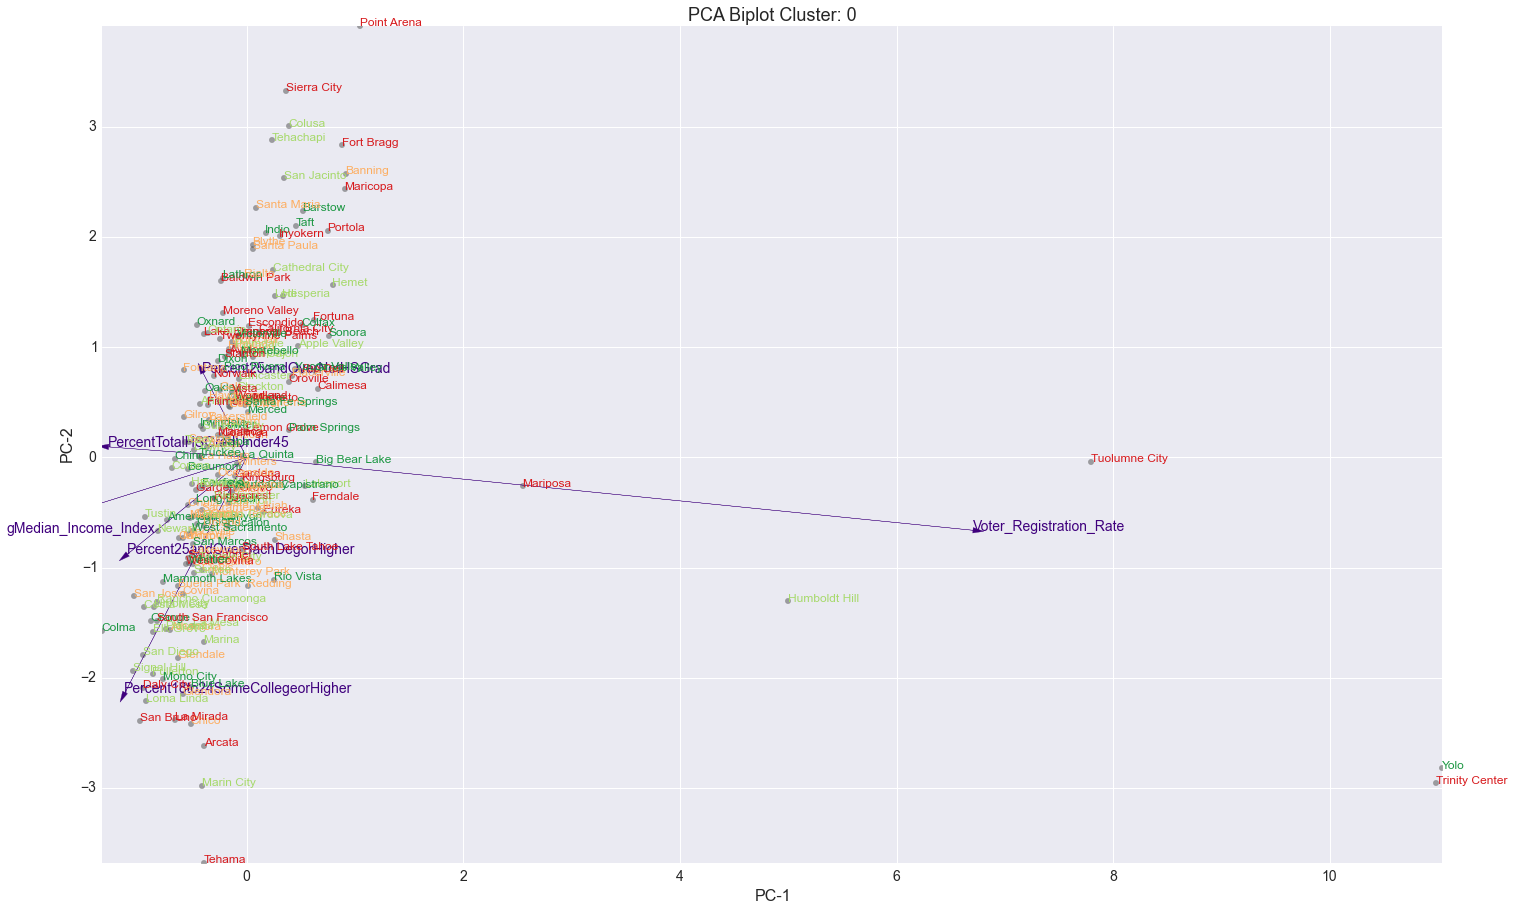

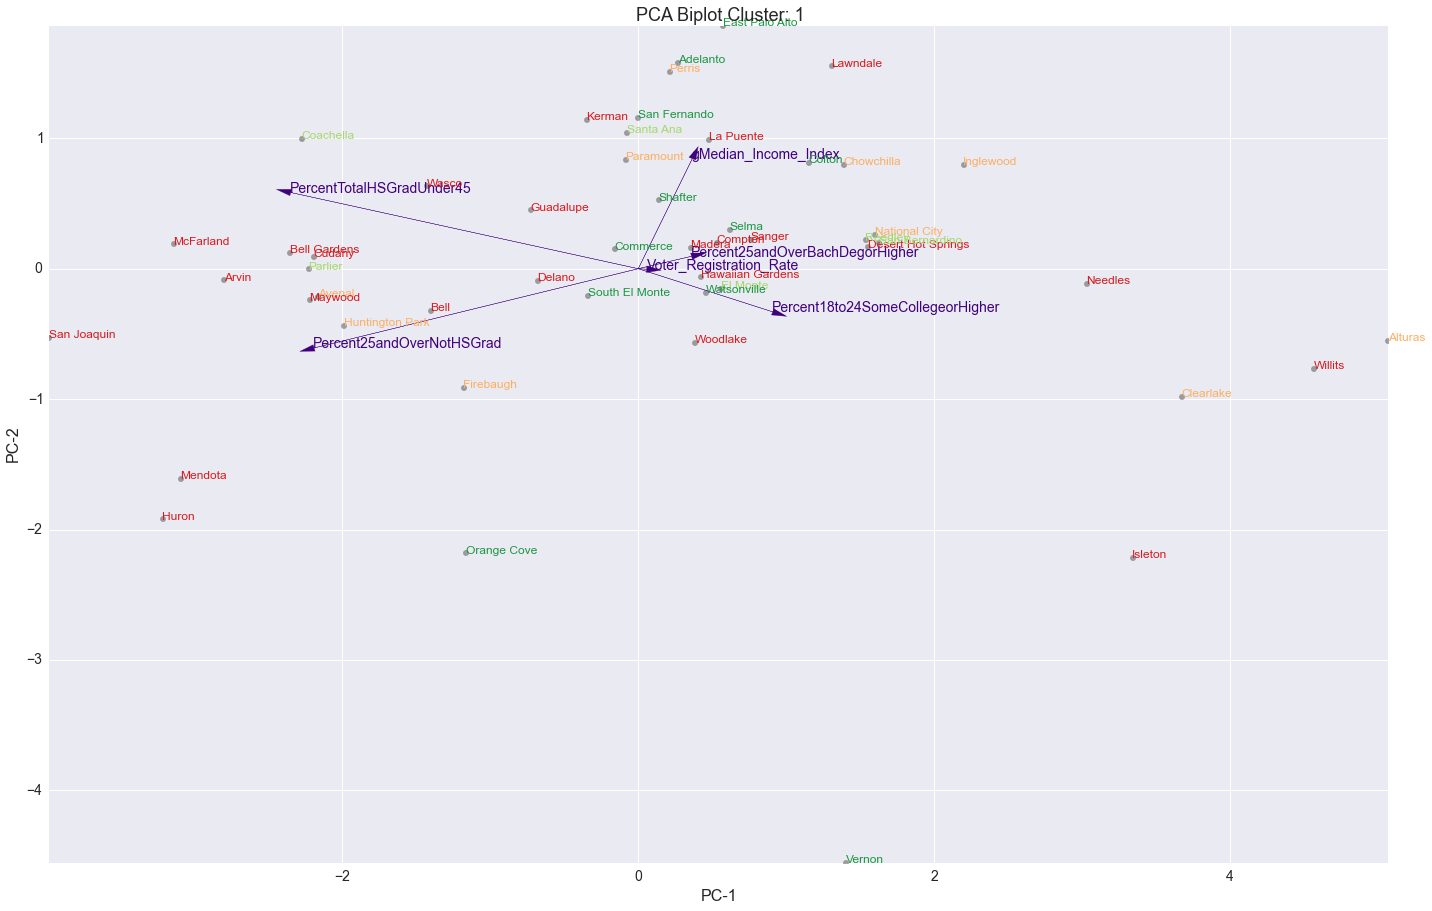

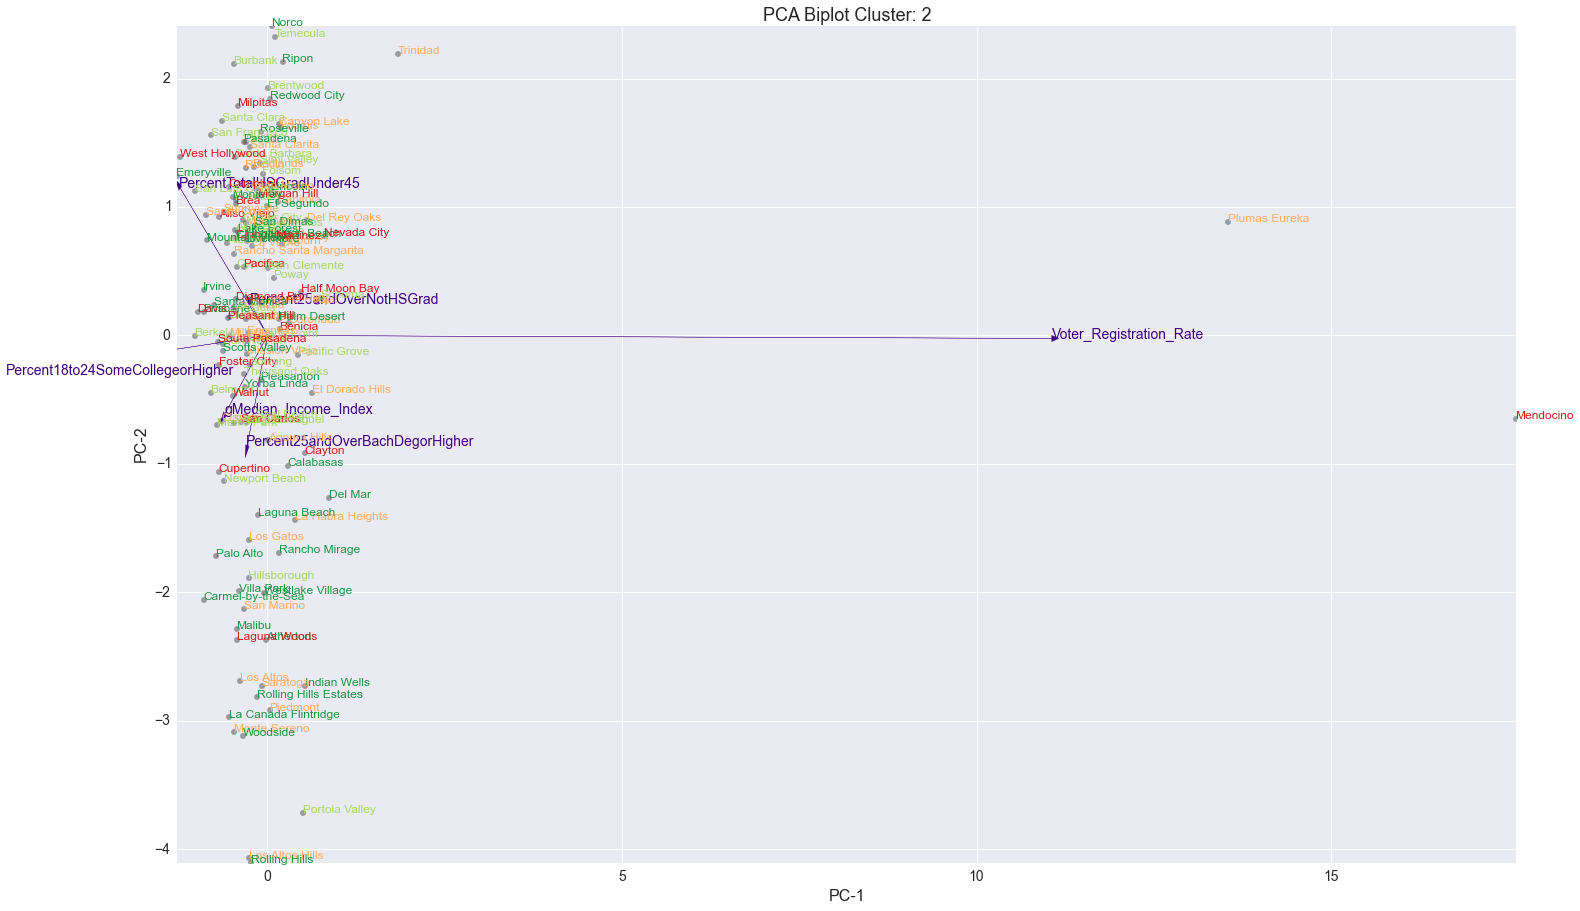

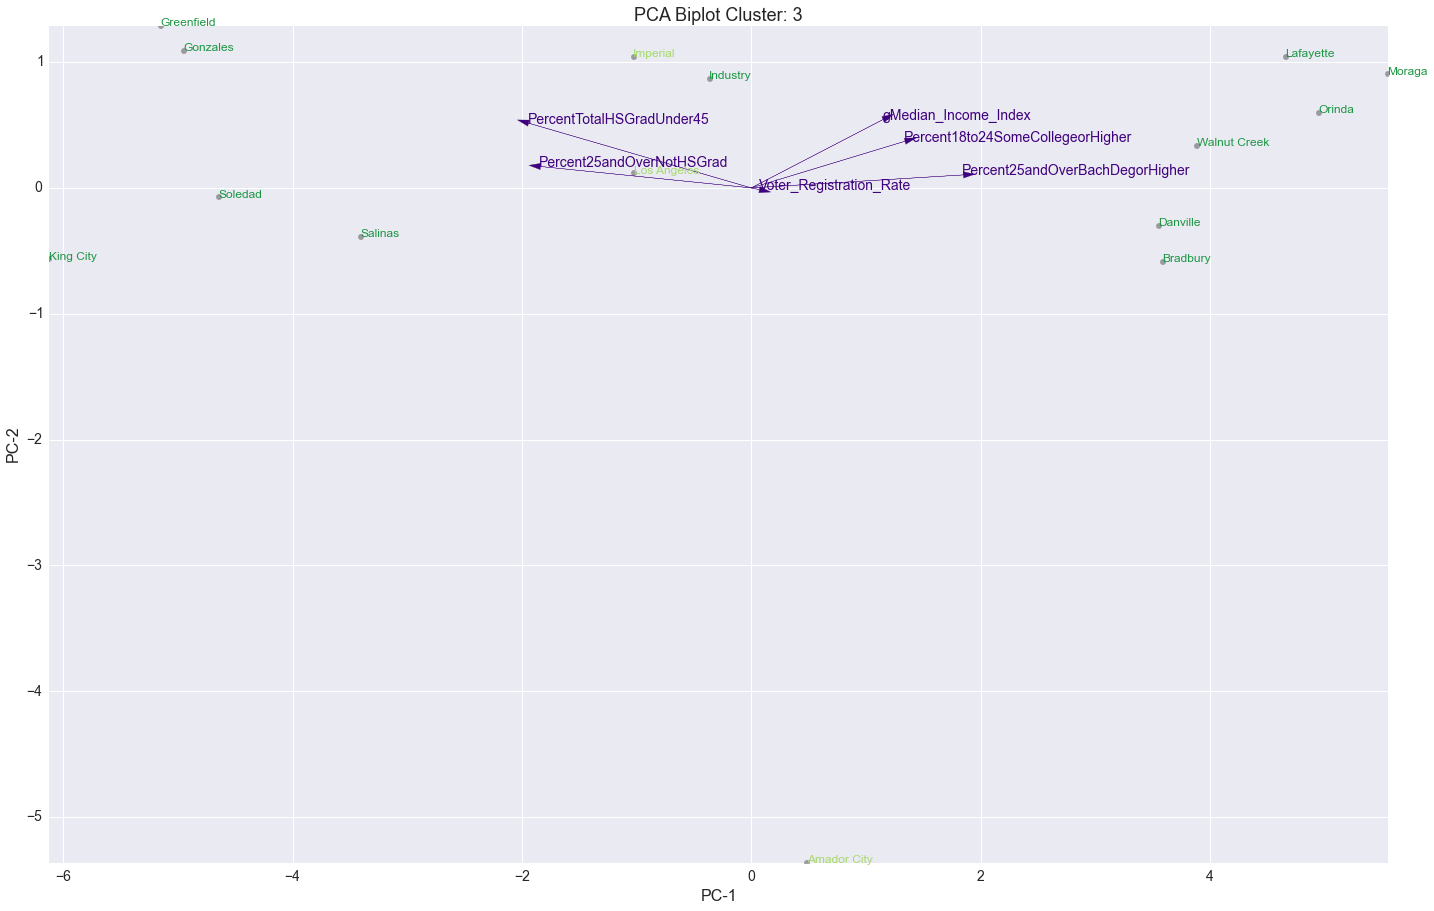

In [55]:
for i in set(y_labels):
    mask = biplot_std['Cluster'] == i
    mask_df = biplot_std[mask]
    biplot(mask_df, 1.5, status = i)

In [30]:
# Save data for plotting map
data['Cluster'] = y_labels

In [31]:
data.to_csv('recommendations.csv')

In [32]:
data.head()

,County,Jurisdiction,Longitude,Latitude,Target_ResPPD_2013,Annual_ResPPD_2013,Target_EmpPPD_2013,Annual_EmpPPD_2013,Log_Target_ResPPD_2013,Log_Annual_ResPPD_2013,Log_Target_EmpPPD_2013,Log_Annual_EmpPPD_2013,Diversity_Index,Voter_Registration_Rate,Rep_Dem_Ratio,Major_Minor_Crime_Ratio,Percent_Violent,TotCrime/1000People,Crime_Index,HH_Income_Ratio,Fam_Income_Ratio,gMean_Income_Index,PerCapitaIncome_Index,Travel_Time_Index,gMedian_Income_Index,...,TransformationIndex,HH_wchildren,Total_housing_units,Occupied_units,PercentOccupiedUnits,Log_Num_RecyclingProg_2013,Log_MeanTravelTimetoWork,Log_PercentLvgHmBefore8am,Log_PercentNotDrivingAlonetoWork,Log_PercentWorkingOOState,Log_PercentWorkingOOCounty,Log_PercentLessThan3CarsAvail,Log_MedEarningsBachelorsDeg,Log_PercentTotalwBachDegUnder45,Log_PercentTotalHSGradUnder45,Log_Percent18to24SomeCollegeorHigher,Log_Percent25andOverNotHSGrad,Log_Percent25andOverBachDegorHigher,Log_PovertyRate25OverHSGrad,Log_PovertyRate25OverBachDegHgher,Log_MBSAPercentofTotCivEmployed16andOver,Log_PercentLvgHmBefore730am,Difference,Label,Cluster
0,San Bernardino,Adelanto,-117.409215,34.582770,6.9,3.2,40.6,22.0,1.931521,1.163151,3.703768,3.091042,0.693922,0.289470,0.418214,0.110676,9.964771,62.553125,0.191470,2.249584,2.185185,0.420689,0.299772,0.822830,0.576676,...,0.000000,4349,9086,7809,0.859454,3.806662,3.608212,4.174387,3.242592,-0.693147,2.960105,4.273884,10.646710,-0.693559,-0.484480,3.487375,3.407842,2.001480,3.342862,2.370244,3.141232,4.128746,3.7,Excellent,1
1,Los Angeles,Agoura Hills,-118.761676,34.153340,7.0,5.5,15.2,9.9,1.945910,1.704748,2.721295,2.292535,0.285300,0.636399,0.840605,0.030695,2.978056,31.382194,0.264060,0.097842,0.097243,0.522693,0.696002,0.686345,0.791702,...,0.000000,2671,7585,7327,0.965985,3.496508,3.374169,3.918005,2.939162,-1.609438,3.148453,4.036009,11.182503,-1.185482,-1.186891,4.067316,1.458615,3.996364,2.028148,0.000000,4.033630,3.683867,1.5,Fair,2
2,Alameda,Alameda,-122.241636,37.765206,5.5,2.6,21.4,8.2,1.704748,0.955511,3.063391,2.104134,0.703847,0.592058,0.257205,0.041350,3.970847,53.907224,0.073579,0.319145,0.191208,0.501348,0.643853,0.676273,0.727413,...,0.000000,8484,32351,30123,0.931130,3.806662,3.356897,3.856510,3.640214,-0.510826,3.481240,4.321480,10.966421,-0.772173,-0.860476,4.235555,2.230014,3.873282,2.501436,1.547563,3.867069,3.558201,2.9,Good,2
3,Alameda,Albany,-122.297747,37.886870,5.0,1.9,19.3,8.4,1.609438,0.641854,2.960105,2.128232,0.664060,0.561843,0.098452,0.025870,2.521739,62.031393,0.285180,0.301002,0.206153,0.368969,0.635045,0.700160,0.726086,...,0.000000,2806,7889,7401,0.938142,3.784190,3.397858,3.608212,3.933784,-0.223144,3.484312,4.445001,10.983036,-0.623584,-0.656876,4.203199,1.335001,4.269697,2.484907,2.163323,4.223027,3.157000,3.1,Good,2
4,Los Angeles,Alhambra,-118.127015,34.095287,3.8,2.4,14.4,8.6,1.335001,0.875469,2.667228,2.151762,0.756116,0.450673,0.396516,0.045851,4.384077,44.747199,0.065728,0.633876,0.468130,0.485973,0.519930,0.688339,0.651206,...,0.333333,8079,30915,29217,0.945075,3.526361,3.377588,3.883624,3.039749,-1.203973,1.526056,4.216562,10.797880,-0.638180,-0.753278,4.231204,2.975530,3.487375,2.660260,2.140066,3.611149,3.608212,1.4,Fair,0


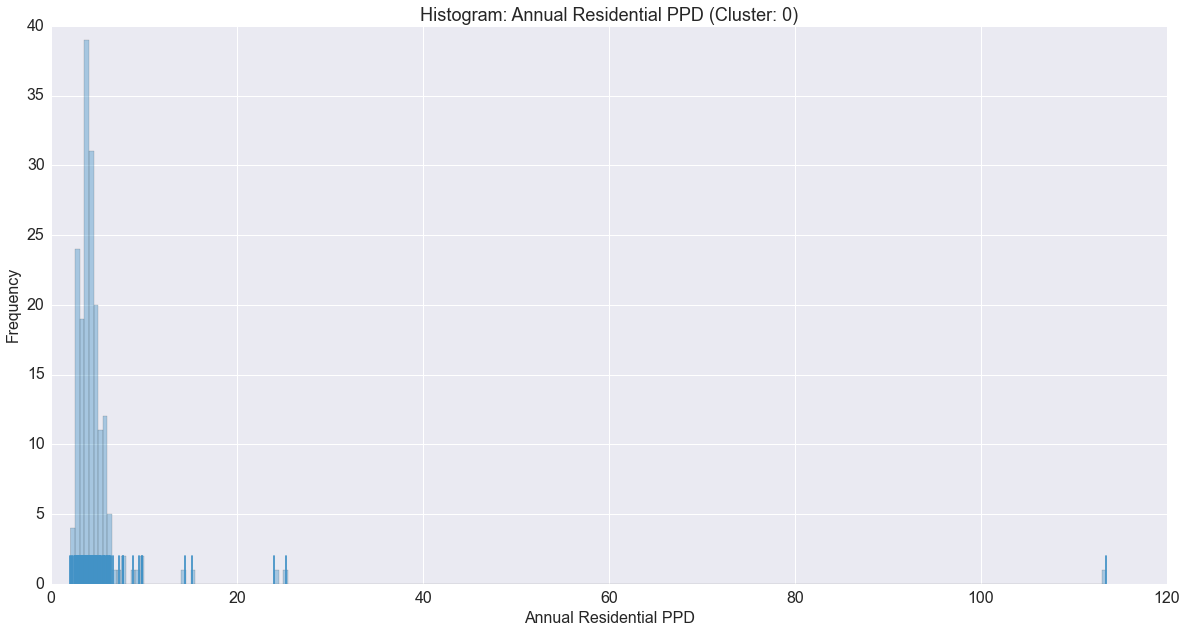

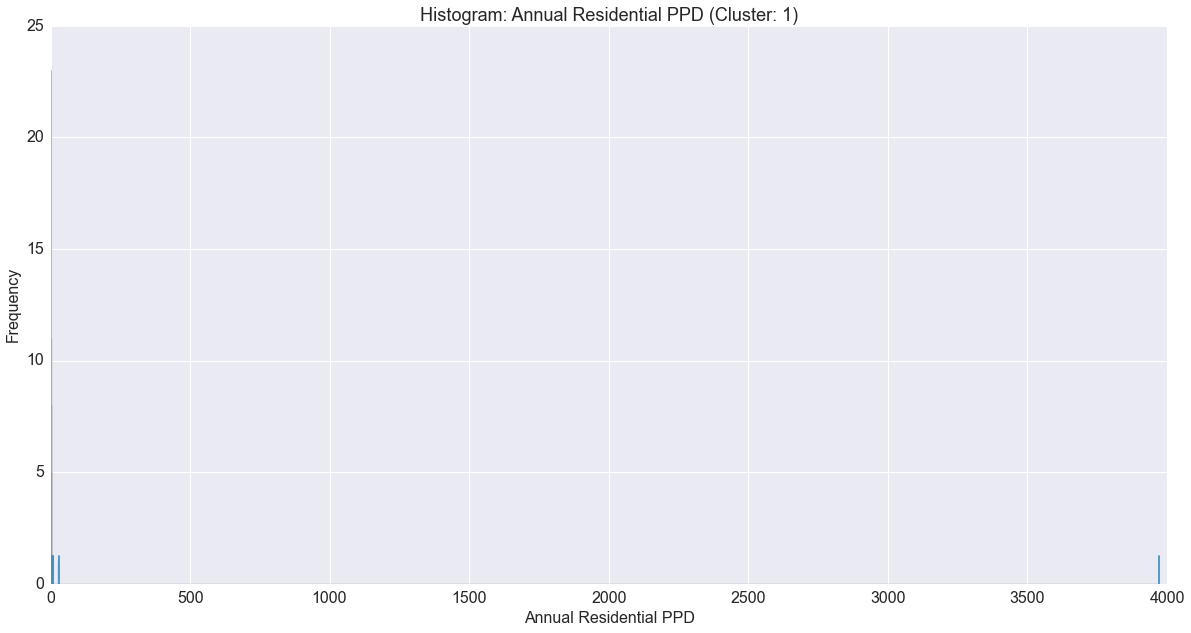

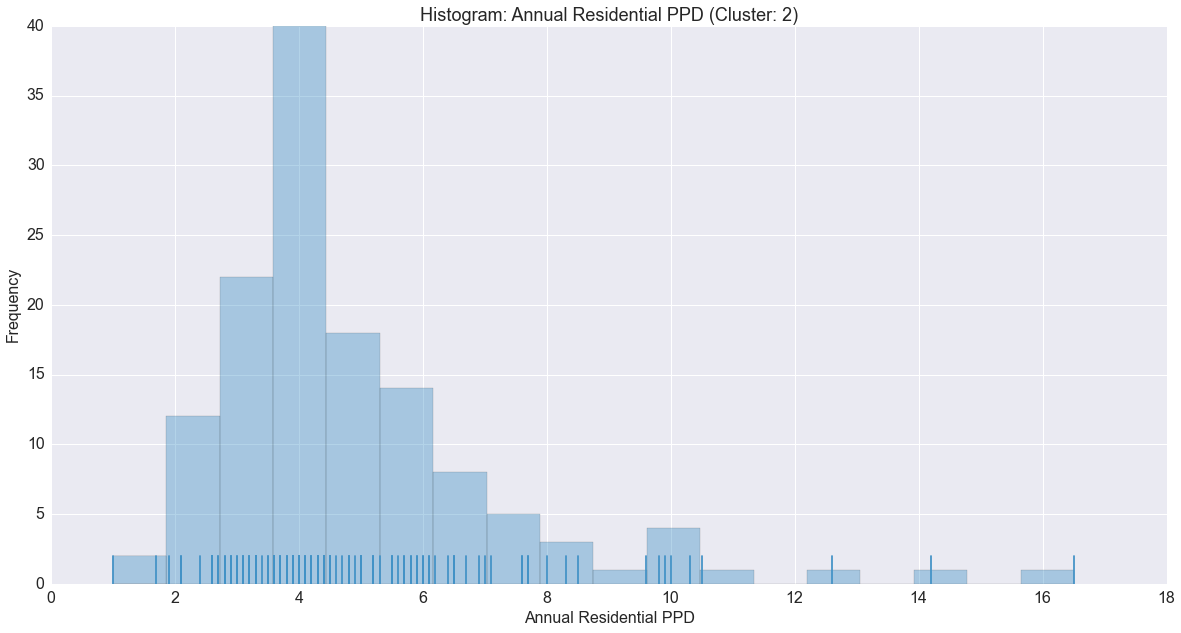

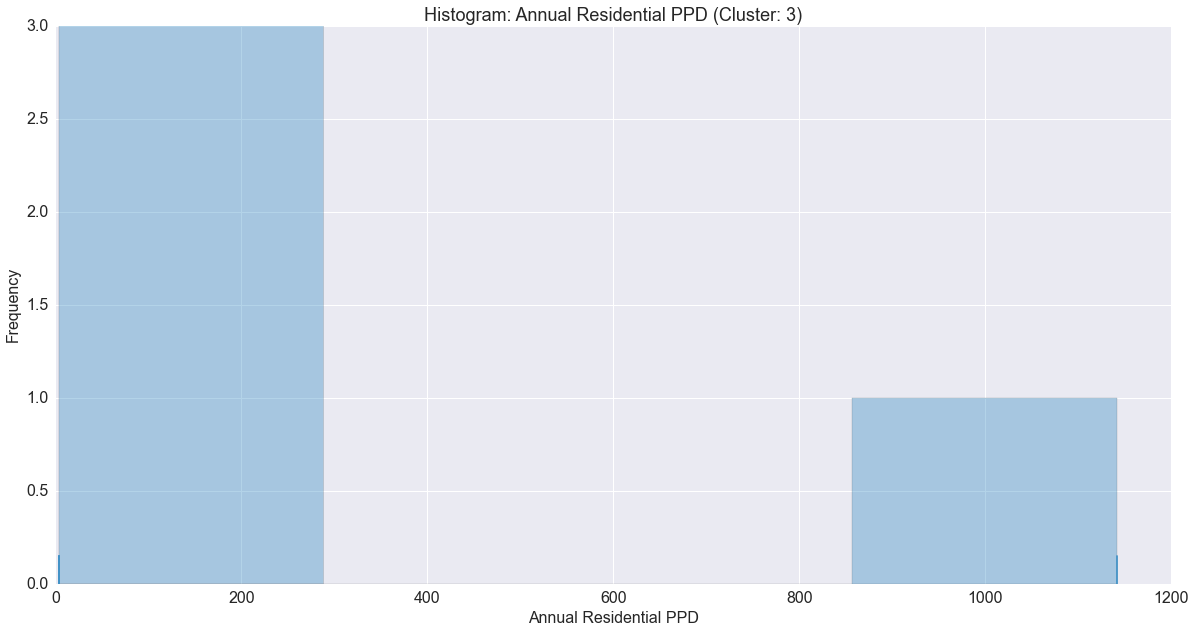

In [34]:
for i in set(y_labels):
    mask = data['Cluster'] == i
    c = str(i)
    mask_df = data[mask]['Annual_ResPPD_2013']
    plt.figure(figsize = (20, 10))
    sns.distplot(mask_df.dropna(), kde = False, rug = True, color = '#4292c6')
    plt.xlabel('Annual Residential PPD', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title('Histogram: Annual Residential PPD (Cluster: ' + c + ')', fontsize = 18)